# Simple REST API (and mapping) example

Using Requests, the most popular module on PyPi.  We're downloading all earthquakes from the past week from the GeoNet API.

## (Requires internet access)



## Simplified REST call using requests:
The GeoNet quakesearch API is defined by these rules: [GET] http://quakesearch.geonet.org.nz/services/1.0.0/geojson?bbox=(bbox)&minmag=(minmag)&maxmag=(maxmag)&mindepth=(mindepth)&maxdepth=(maxdepth)&startdate=(startdate)&enddate=(enddate)

* The API is versioned (1.0.0) to allow for future versions that don't break current clients
* All of the parameters are optional (bbox, minmag, maxmag, mindepth, maxdepth, startdate, enddate).  Leaving them all blank will get information for all recorded quakes.  That's huge.
* We contruct a dictionary with these parameters and use it as an argument

In [32]:
import requests
from datetime import datetime
import json

params = {'bbox': [165.0, -47.5, 179.0, -34.0],
          'startdate': datetime(2016, 4, 8, 0, 0, 0),
          'enddate':   datetime(2016, 4, 8, 1, 0, 0)}
r = requests.get('http://quakesearch.geonet.org.nz/services/1.0.0/geojson', params=params)

# convert from json string to a Python object
data = r.json()

# simple print of dict:
print('unformatted version:\n', data)

# 'pretty print' using the json module to re-jsonify it with indents
print('\n\n\npretty version:\n', json.dumps(data, indent=4))

unformatted version:
 {'features': [{'geometry_name': 'origin_geom', 'properties': {'depth': '5', 'publicid': '2016p264941', 'magnitudetype': 'M', 'evaluationmethod': 'LOCSAT', 'earthmodel': 'iasp91', 'minimumdistance': '0.4706227183', 'eventtype': 'earthquake', 'magnitude': '2.706450786', 'modificationtime': '2016-04-27T22:41:24.224Z', 'magnitudestationcount': '4', 'evaluationmode': 'manual', 'latitude': '-42.22879791', 'originerror': '0.8928273347', 'depthtype': 'operator assigned', 'usedstationcount': '14', 'longitude': '172.816803', 'evaluationstatus': 'confirmed', 'azimuthalgap': '58.77450562', 'origintime': '2016-04-08T00:41:01.431Z', 'usedphasecount': '22'}, 'type': 'Feature', 'geometry': {'coordinates': [172.816803, -42.22879791], 'type': 'Point'}}, {'geometry_name': 'origin_geom', 'properties': {'depth': '156.2532806', 'publicid': '2016p264906', 'magnitudetype': 'M', 'evaluationmethod': 'LOCSAT', 'earthmodel': 'iasp91', 'minimumdistance': '0.8789411783', 'eventtype': 'earthqua

# Visualisation:

Small demo that plots earthquake location and magnitude on a map (this code works fine as a script outside this Jupyter notebook)

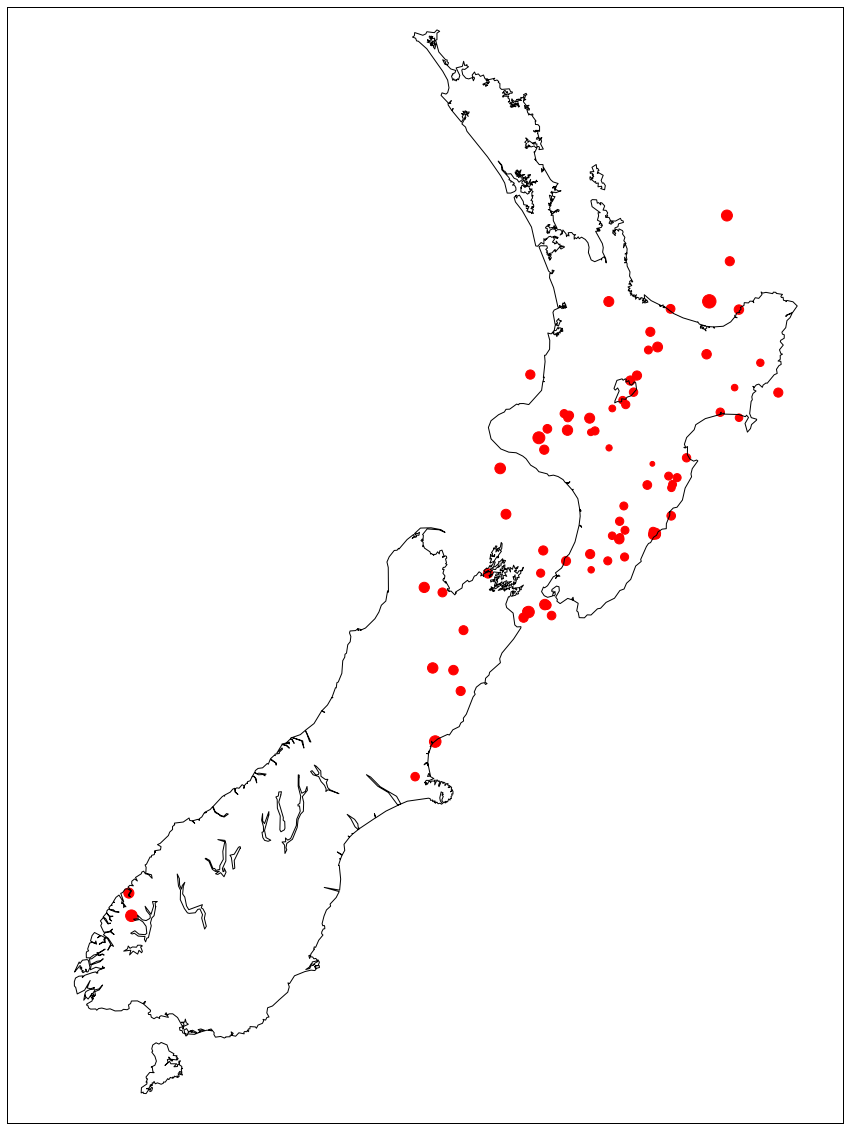

In [22]:
#!/usr/bin/env python

# A very simple Python script that uses the GeoNet quakesearch API to fetch info on earthquakes

from __future__ import print_function
import requests
import json
from datetime import datetime
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib import rcParams

def quakes(params, url='http://quakesearch.geonet.org.nz/services/1.0.0/geojson'):

    r = requests.get(url, params=params)
    r.raise_for_status()

    return r.json()

def display_map(quakedata):
    # set fig size for Jupyter notebook
    rcParams['figure.figsize'] = (40.0, 20.0)
    
    # setup Lambert Conformal basemap.
    m = Basemap(projection='lcc',
                resolution='i',
                lat_0=-41., lon_0=174.,
                llcrnrlon=165., llcrnrlat=-47.5,
                urcrnrlon=179., urcrnrlat=-34.)

    # unfortunately this is a slow operation
    m.drawcoastlines()
    
    # draw all earthquakes, size of circle corresponds to magnitude of quake
    quake_lats = []
    quake_lons = []
    quake_mags = []
    for feature in quakedata['features']:
        #print(feature['properties']['publicid'], feature['geometry']['coordinates'])
        # we want to plot a point for latitude and longitude which are in the properties dict
        properties = feature['properties']
        quake_lats.append(float(properties['latitude']))
        quake_lons.append(float(properties['longitude']))
        quake_mags.append(float(properties['magnitude'])*40)

    x, y = m(quake_lons, quake_lats)
    m.scatter(x, y, quake_mags, marker='o', color='r')
    plt.show()

def main():

    # construct params.
    # All options: [GET] /csv?bbox=(bbox)&minmag=(minmag)&maxmag=(maxmag)&mindepth=(mindepth)&maxdepth=(maxdepth)&startdate=(startdate)&enddate=(enddate)
    params = {'bbox': [165.0, -47.5, 179.0, -34.0],
            'startdate': datetime(2016, 4, 6, 22, 0, 0),
            'enddate': datetime(2016, 4, 8, 15, 0, 0)}

    # get the data from the REST API
    quakedata = quakes(params)

    # iterate over the data (a pretty complex dict)
    #for feature in quakedata['features']:
    #    print(feature['properties']['publicid'], feature['geometry']['coordinates'])

    display_map(quakedata)

if __name__ == "__main__":
    main()